In [2]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Evaluation metric, which we want to minimize
# https://en.wikipedia.org/wiki/Symmetric_mean_absolute_percentage_error

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 200.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.nanmean(diff)

In [3]:
# Importing web traffic dataset

data_set = pd.read_csv('data/train_1.csv').fillna(0)

In [4]:
# Explore dataset 

pages = data_set['Page']
pages

0                   2NE1_zh.wikipedia.org_all-access_spider
1                    2PM_zh.wikipedia.org_all-access_spider
2                     3C_zh.wikipedia.org_all-access_spider
3                4minute_zh.wikipedia.org_all-access_spider
4         52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
5                   5566_zh.wikipedia.org_all-access_spider
6                 91Days_zh.wikipedia.org_all-access_spider
7                  A'N'D_zh.wikipedia.org_all-access_spider
8                  AKB48_zh.wikipedia.org_all-access_spider
9                  ASCII_zh.wikipedia.org_all-access_spider
10                 ASTRO_zh.wikipedia.org_all-access_spider
11        Ahq_e-Sports_Club_zh.wikipedia.org_all-access_...
12        All_your_base_are_belong_to_us_zh.wikipedia.or...
13               AlphaGo_zh.wikipedia.org_all-access_spider
14               Android_zh.wikipedia.org_all-access_spider
15            Angelababy_zh.wikipedia.org_all-access_spider
16                 Apink_zh.wikipedia.or

In [6]:
#Explore dataset

data_set.head(100)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
6,91Days_zh.wikipedia.org_all-access_spider,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0


In [7]:
# Get numerical data

time_series = data_set.iloc[:, 1:].values.astype(np.float64)


In [8]:
# Log transform & inverse trf functions

def log_trf(x):
    return np.log(x + 1.0)

def log_inv_trf(x):
    return np.exp(x) - 1.0

In [11]:
# Log transformation of web traffic data

# time_series_log = log_trf(time_series[8])
time_series_log = time_series[8]

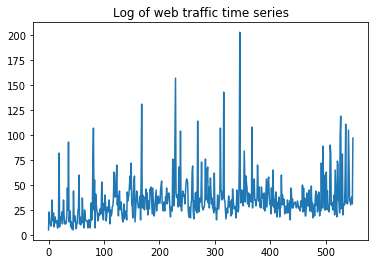

In [12]:
plt.plot(time_series_log)
plt.title("Log of web traffic time series")
plt.show()

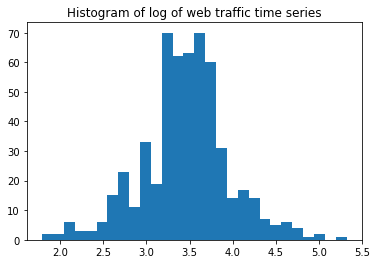

In [82]:
plt.hist(time_series_log, bins='auto')
plt.title("Histogram of log of web traffic time series")
plt.show()

## "Hands-on Machine Learning in Scikit and Tensorflow" by Geron 2017

In [2]:
n_inputs = 3
n_neurons = 5

#### Set up basic RNN from scratch

In [16]:
X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

In [19]:
Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons],dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=[n_neurons,n_neurons],dtype=tf.float32))
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

In [20]:
Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)

In [21]:
init = tf.global_variables_initializer()

In [17]:
# Mini-batch: instance 0,instance 1,instance 2,instance 3 
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]]) # t = 0 
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) # t = 1

In [22]:
with tf.Session() as sess: 
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

In [23]:
print(Y0_val)

[[ 0.97275561 -0.97857779 -0.0832408   0.90643054  0.99771076]
 [ 0.99998772 -0.99973899 -0.23618135  0.71067297  1.        ]
 [ 1.         -0.99999696 -0.3782517   0.2635709   1.        ]
 [ 0.10808659  0.99540544  0.9999581  -1.          1.        ]]


#### Static_rnn() using BasicRNNCell()

In [24]:
X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

In [25]:
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.contrib.rnn.static_rnn(
                          basic_cell, [X0, X1], dtype=tf.float32)

In [26]:
Y0, Y1 = output_seqs

#### Use n_steps to make number of time steps generic

In [3]:
X_batch = np.array([ 
    #t=0 t=1
    [[0, 1, 2], [9, 8, 7]], # instance 0 
    [[3, 4, 5], [0, 0, 0]], # instance 1 
    [[6, 7, 8], [6, 5, 4]], # instance 2 
    [[9, 0, 1], [3, 2, 1]], # instance 3
])

In [4]:
n_inputs = 3
n_neurons = 5
n_steps = X_batch.shape[1] # time steps

In [5]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
X_seqs = tf.unstack(tf.transpose(X, perm=[1, 0, 2]))
basic_cell2 = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.contrib.rnn.static_rnn(
                          basic_cell2, X_seqs, dtype=tf.float32)
outputs = tf.transpose(tf.stack(output_seqs), perm=[1, 0, 2])

In [6]:
init = tf.global_variables_initializer()

In [7]:
with tf.Session() as sess: 
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})

In [8]:
print(outputs_val)

[[[-0.64744598  0.61593926  0.54547036  0.43640345 -0.36586693]
  [ 0.14475287 -0.99842906  0.99877882  0.9993012   0.61952823]]

 [[-0.81758469  0.06571868  0.94877142  0.95406371 -0.25064629]
  [ 0.39888588 -0.69347245  0.81610215 -0.12611854  0.55465138]]

 [[-0.91009706 -0.52759618  0.99531168  0.99718702 -0.12785833]
  [ 0.17021692 -0.98547703  0.99591607  0.94727474  0.92756385]]

 [[ 0.99969143 -0.94428062 -0.93567157  0.17320144  0.68526661]
  [-0.36932015 -0.37706494 -0.43991041  0.68568027  0.7550993 ]]]


#### Dynamic_rnn() using BasicRNNCell()

In [3]:
X_batch = np.array([ 
    #t=0 t=1
    [[0, 1, 2], [9, 8, 7]], # instance 0 
    [[3, 4, 5], [0, 0, 0]], # instance 1 
    [[6, 7, 8], [6, 5, 4]], # instance 2 
    [[9, 0, 1], [3, 2, 1]], # instance 3
])

In [4]:
n_inputs = 3
n_neurons = 5
n_steps = X_batch.shape[1] # time steps

In [5]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
basic_cell3 = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(
                          basic_cell3, X, dtype=tf.float32)

In [6]:
init = tf.global_variables_initializer()

In [7]:
with tf.Session() as sess: 
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})

In [8]:
print(outputs_val)

[[[-0.71199358 -0.8294757  -0.07713201 -0.03535477  0.60435903]
  [-0.99999988  0.46012989  0.28316474  0.91823536  0.99998873]]

 [[-0.99941421 -0.93490154 -0.35914606  0.49660674  0.99508268]
  [ 0.15776657  0.87686479  0.8882755  -0.07429192  0.02505943]]

 [[-0.99999887 -0.97600323 -0.58794862  0.80928499  0.99995065]
  [-0.99995697  0.9412275   0.68290931  0.88095748  0.99948901]]

 [[-0.9999879   0.99668032  0.98608631  0.98273796  0.9999159 ]
  [-0.93117052  0.57179195  0.76392072 -0.63103932  0.73580575]]]
